In [5]:
import cv2
import os
import numpy as np
from PIL import Image

In [2]:
splits = ["train"]
#fold_A = r"C:\Users\1603585\Documents\Python Scripts\Aishwarya\GAN_pix2pix\pytorch-CycleGAN-and-pix2pix-master\datasets\docdata\test_jj\\"
fold_A = r"/colt/py_stuffs/Raghav/img_aug/multi_font_img/"
fold_B = r"/colt/py_stuffs/Raghav/img_aug/single_font_img/"
fold_AB = r"/colt/py_stuffs/Deepa/pix2pix_git/datasets/merged_data/"
use_AB = ""
num_imgs = 100000

In [11]:
for sp in splits:
    img_fold_A = os.path.join(fold_A)
    print(img_fold_A)
    img_fold_B = os.path.join(fold_B)
    img_list = filter( lambda f: not f.startswith('.'), os.listdir(img_fold_A)) # ignore hidden folders like .DS_Store
    img_list = list(img_list)
    if use_AB:
        print("yes")
        img_list = [img_path for img_path in img_list if '_A.' in img_path]

    num_imgs = min(num_imgs, len(img_list))
    print('split = %s, use %d/%d images' % (sp, num_imgs, len(img_list)))
    img_fold_AB = os.path.join(fold_AB, sp)
    if not os.path.isdir(img_fold_AB):
        os.makedirs(img_fold_AB)
    print('split = %s, number of images = %d' % (sp, num_imgs))
    for n in range(num_imgs):
        name_A = img_list[n]
        path_A = os.path.join(img_fold_A, name_A)
        if use_AB:
            name_B = name_A.replace('_A.', '_B.')
        else:
            name_B = name_A
        path_B = os.path.join(img_fold_B, name_B)
        if os.path.isfile(path_A) and os.path.isfile(path_B):
            name_AB = name_A
            if use_AB:
                name_AB = name_AB.replace('_A.', '.') # remove _A
            path_AB = os.path.join(img_fold_AB, name_AB)
            im_A = cv2.imread(path_A, cv2.IMREAD_COLOR)
            #im_A = cv2.resize(im_A,(1280,1536),interpolation = cv2.INTER_CUBIC) 
            
            
            im_B = cv2.imread(path_B, cv2.IMREAD_COLOR)
            #im_B = cv2.resize(im_B,(1280,1536),interpolation = cv2.INTER_CUBIC) 
            im_AB = np.concatenate([im_A, im_B], 1)
            cv2.imwrite(path_AB,im_AB)



/colt/py_stuffs/Raghav/img_aug/multi_font_img/
split = train, use 500/500 images
split = train, number of images = 500


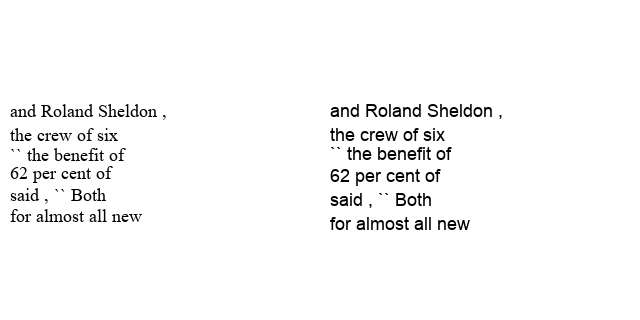

In [13]:
file = os.listdir(fold_AB+'/train/')[0]
Image.open(fold_AB+'/train/'+file)#.size

##### plot gan graph

In [ ]:
import json
import ast
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
file = open(r"C:\Users\1603585\Documents\Python Scripts\Aishwarya\GAN_pix2pix\pytorch-CycleGAN-and-pix2pix-master\checkpoints\docdata_pix2pix\loss_log.txt")
epoch_list = []
generator_list = []
discriminator_list = []
l1_loss = []

for line in file:
    try:
        l_dict = json.loads(json.dumps(ast.literal_eval(line)))
    except:
        continue
    epoch_list.append(l_dict['epoch'])
    g_loss = float(l_dict["G_GAN"]) + float(l_dict["G_L1"]) 
    generator_list.append(g_loss)
    l1_loss.append(float(l_dict["G_L1"]))
    d_loss = (float(l_dict["D_real"]) + float(l_dict["D_fake"]))*0.5
    discriminator_list.append(d_loss)
file.close()

In [ ]:
plt.plot(epoch_list, generator_list, 'b-', label='G_loss')
# plt.plot(epoch_list, l1_loss, 'b-', label='l1_loss')
# plt.plot(epoch_list, discriminator_list, 'r-', label = 'D_loss')
plt.legend(loc='upper right')
plt.title("Comparing G")
plt.xlabel("Epochs")
plt.ylabel("Loss")

In [ ]:
plt.plot(epoch_list, discriminator_list, 'r-', label = 'D_loss')
plt.legend(loc='upper right')
plt.title("Comparing G")
plt.xlabel("Epochs")
plt.ylabel("Loss")